In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline

In [6]:
data=pd.read_csv('email spams.csv',encoding='ISO-8859-1')
data

,title,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
1334,ham,"Oh... Icic... K lor, den meet other day..."
1335,ham,Oh ! A half hour is much longer in Syria than ...
1336,ham,"Sometimes we put walls around our hearts,not j..."
1337,ham,"Sweet, we may or may not go to 4U to meet carl..."


In [7]:
data.head()

,title,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [8]:
data.tail()

,title,Message
1334,ham,"Oh... Icic... K lor, den meet other day..."
1335,ham,Oh ! A half hour is much longer in Syria than ...
1336,ham,"Sometimes we put walls around our hearts,not j..."
1337,ham,"Sweet, we may or may not go to 4U to meet carl..."
1338,ham,Then she buying today? Ü no need to c meh...


In [9]:
data.shape

(1339, 2)

In [10]:
data.columns

Index(['title', 'Message'], dtype='object')

In [11]:
print(data.info())
data.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1339 entries, 0 to 1338
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    1339 non-null   object
 1   Message  1339 non-null   object
dtypes: object(2)
memory usage: 21.0+ KB
None


title      0
Message    0
dtype: int64

In [12]:
data.nunique()

title         2
Message    1297
dtype: int64

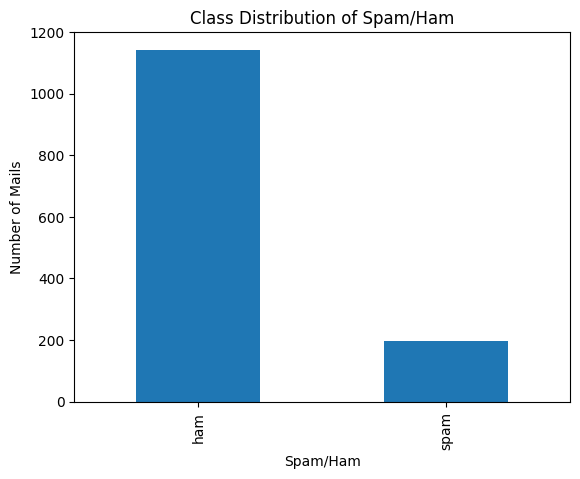

In [13]:
class_counts = data['title'].value_counts()
class_counts.plot(kind='bar')
plt.title('Class Distribution of Spam/Ham')
plt.xlabel('Spam/Ham')
plt.ylabel('Number of Mails')
plt.show()

In [14]:
# Encoding Categories into 0 and 1 :
data["Spam"] = [1 if i=="spam" else 0 for i in data["title"]]
data.head()

,title,Message,Spam
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0


In [15]:
X = data["Message"]
y = data.Spam

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1071,), (268,), (1071,), (268,))

In [18]:
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])

In [19]:
clf.fit(X_train, y_train)

Pipeline(steps=[('vectorizer', CountVectorizer()), ('nb', MultinomialNB())])

In [20]:
clf.score(X_test,y_test)

0.9813432835820896

In [22]:
message = ["Even my brother is not like to speak with me. They treat me like aids patent.",
"I HAVE A DATE ON SUNDAY WITH WILL!!",
"	URGENT! You have won a 1 week FREE membership in our �100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18",
"Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed �1000 cash or �5000 prize!",
" Umma. Did she say anything "]

y_pred = clf.predict(message)
for i in y_pred:
    if i==0:
        print("Not a Spam email 👍")
    else:
        print("Spam email 🛑")

Not a Spam email 👍
Not a Spam email 👍
Spam email 🛑
Spam email 🛑
Not a Spam email 👍
